In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
# Ruta al archivo ZIP
ruta_zip = '..\\..\\datasets\\raw\\archive.zip'

# Lista para almacenar los datos de los archivos CSV
datos_csv = []

# Abrir el archivo ZIP y leer los archivos CSV
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    # Recorrer cada archivo en el ZIP
    for nombre_archivo in zip_ref.namelist():
        # Extraer el archivo
        with zip_ref.open(nombre_archivo) as archivo_csv:
            # Leer el archivo CSV y almacenar los datos en un DataFrame
            datos = pd.read_csv(archivo_csv, sep=',', encoding='utf-8')
            # Agregar los datos ala lista
            datos_csv.append(datos)

# Concatenar todos los DataFrames en uno solo
df_emisiones = pd.concat(datos_csv, ignore_index=True)

In [36]:
df_emisiones.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [37]:
#filtro por país, estados unidos
emisiones_usa = df_emisiones[df_emisiones['Country'] == 'United States']

#filtro por tipo de energia, solamente interesa petroleo y derivados
emisiones_usa_petroleo = emisiones_usa[emisiones_usa['Energy_type'] == 'petroleum_n_other_liquids']

In [38]:
columnas_a_eliminar = ['Unnamed: 0', 'Energy_production', 'GDP', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP']
emisiones_usa_petroleo = emisiones_usa_petroleo.drop(columnas_a_eliminar, axis=1)
emisiones_usa_petroleo.head()

,Country,Energy_type,Year,Energy_consumption,Population,CO2_emission
1323,United States,petroleum_n_other_liquids,1980,34.158965,227119.0,2455.243565
2709,United States,petroleum_n_other_liquids,1981,31.890666,229416.2,2244.422124
4095,United States,petroleum_n_other_liquids,1982,30.198364,231608.5,2101.609960
5481,United States,petroleum_n_other_liquids,1983,30.032292,233731.0,1994.448822
6867,United States,petroleum_n_other_liquids,1984,31.035536,235784.8,1978.052717


## Visualizacion

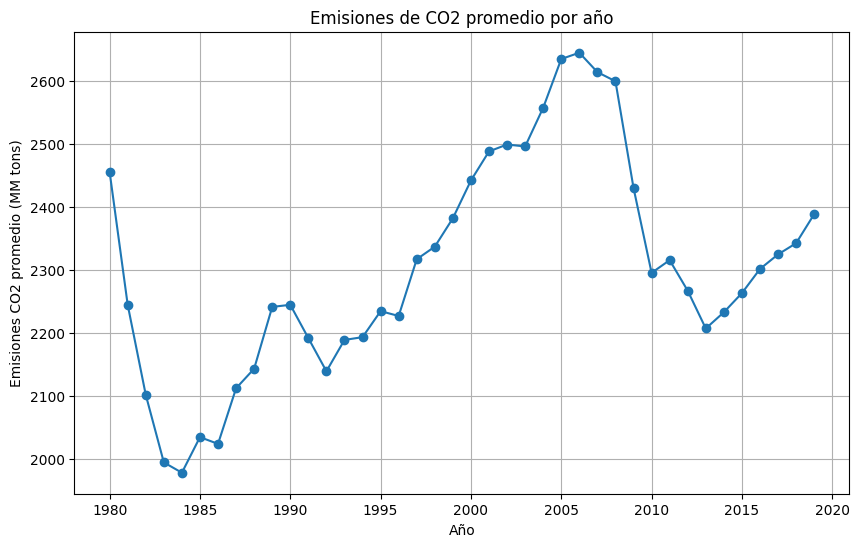

In [40]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(emisiones_usa_petroleo['Year'], emisiones_usa_petroleo['CO2_emission'], marker='o', linestyle='-')

# Añadir título y etiquetas
plt.title('Emisiones de CO2 promedio por año')
plt.xlabel('Año')
plt.ylabel('Emisiones CO2 promedio (MM tons)')

# Mostrar el gráfico
plt.grid(True)
plt.show()